In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import *
from sklearn.metrics import log_loss, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
!pip install catboost
from catboost import CatBoostClassifier
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.9 MB/s eta 0:00:00


In [ ]:

train = pd.read_csv('https://raw.githubusercontent.com/Asmaa6777/Vegetation-Mapping-/main/Train%20(6).csv')
test = pd.read_csv('https://raw.githubusercontent.com/Asmaa6777/Vegetation-Mapping-/main/Test%20(4).csv')
sub = pd.read_csv('https://raw.githubusercontent.com/Asmaa6777/Vegetation-Mapping-/main/submission%20(5).csv')
id = test['id']


In [ ]:
X_train = train.copy()
X_test = test.copy()
X_test = test.drop('id', axis=1)
X_train = X_train.drop('Target', axis=1)
X_train = X_train.drop('id', axis=1)
y_train = train['Target']

In [ ]:
'''le = LabelEncoder()
y_train = le.fit_transform(y_train)

SyntaxError: incomplete input (<ipython-input-5-e4e18f4ba4c0>, line 1)

In [ ]:

isolation_forest = IsolationForest(contamination=0.1)  # Adjust contamination rate
is_inlier = isolation_forest.fit_predict(X_train)  # Returns 1 for inliers, -1 for outliers

# Keep only inliers
X_train_cleaned = X_train[is_inlier == 1]
y_train_cleaned = y_train[is_inlier == 1]


In [ ]:
# Define the imputer for numerical data
num = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
 ])
cat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
# Apply the preprocessing pipeline to the data
X_train_prepared = num.fit_transform(X_train_cleaned)
X_train_prepared = cat.fit_transform(X_train_prepared)
X_test_prepared = num.transform(X_test)
X_test_prepared = cat.transform(X_test_prepared)

In [ ]:
'''predictions2 = bagged_knn.predict(X_test_prepared)

NameError: name 'bagged_knn' is not defined

In [ ]:
'''pred =bagged_knn.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, pred)
print(f"Log Loss: {log_loss_value}")

Log Loss: 1.5149415097055858


In [ ]:
'''from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_prepared, y_train_cleaned)


SyntaxError: incomplete input (<ipython-input-12-4b2ab67c8c6c>, line 1)

In [ ]:
'''predictions = rf_model.predict(X_test_prepared )

In [ ]:
'''prediction= rf_model.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, prediction)
print(f"Log Loss: {log_loss_value}")

In [ ]:
# Assuming you have your features in X and target variable in y
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_prepared , y_train_cleaned, test_size=0.2, random_state=42 )

In [ ]:
train.shape

(2123, 43)

In [ ]:
from catboost import CatBoostClassifier

# Initialize CatBoost with class weights
cat = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=6,
                           class_weights=[1] * 45,  # Adjust this based on the imbalance
                           random_seed=42)

# Fit the model
cat_modle = cat.fit(X_train_prepared, y_train_cleaned, eval_set=(X_valid, y_valid), verbose=100)


0:	learn: 3.7372573	test: 3.7395708	best: 3.7395708 (0)	total: 2.56s	remaining: 21m 20s
100:	learn: 3.4007187	test: 3.4012757	best: 3.4012757 (100)	total: 3m 10s	remaining: 12m 30s
200:	learn: 3.3900507	test: 3.3907650	best: 3.3907650 (200)	total: 6m 7s	remaining: 9m 6s
300:	learn: 3.3793186	test: 3.3794833	best: 3.3794833 (300)	total: 8m 58s	remaining: 5m 56s
400:	learn: 3.3685364	test: 3.3679097	best: 3.3679097 (400)	total: 11m 47s	remaining: 2m 54s
499:	learn: 3.3580966	test: 3.3581326	best: 3.3581326 (499)	total: 14m 34s	remaining: 0us

bestTest = 3.358132597
bestIteration = 499



fix the val

In [ ]:
pred = cat_modle.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, pred)
print(f"Log Loss: {log_loss_value}")

Log Loss: 3.3580966386078246


In [15]:
seed = 42
model = CatBoostClassifier(random_state=seed)
skf = StratifiedKFold(n_splits=5)

def validate(trainset, testset, target_col, unique_classes):
    model.fit(trainset.drop(columns=[target_col]), trainset[target_col])
    y_predicted = model.predict_proba(testset.drop(columns=[target_col]))
    valid_idx = testset[target_col].notna()
    valid_testset = testset[target_col][valid_idx]
    valid_pred = y_predicted[valid_idx]
    score = log_loss(valid_testset, valid_pred, labels=unique_classes)
    print(f"Log Loss: {score}")
    return score

unique_classes = np.sort(train['Target'].unique())
scores = []

for train_index, test_index in skf.split(train.drop(columns='Target'), train['Target']):
    train_v, test_v = train.iloc[train_index], train.iloc[test_index]
    score = validate(trainset=train_v, testset=test_v, target_col='Target', unique_classes=unique_classes)
    scores.append(score)

print(f'Mean Log Loss: {np.mean(scores)}')
value  = np.array(scores).mean()

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="id_id8vpdla6x": Cannot convert 'b'id_id8vpdla6x'' to float

In [16]:
# 2. Make predictions (class probabilities or labels)
y_pred_proba = cat.predict_proba(X_valid)  # Probabilities
y_pred = cat.predict(X_valid)  # Class labels

In [17]:
y_pred = cat_modle.predict(X_test_prepared)
y_pred_proba = cat_modle.predict_proba(X_test_prepared)

In [18]:
test.shape

(923, 42)

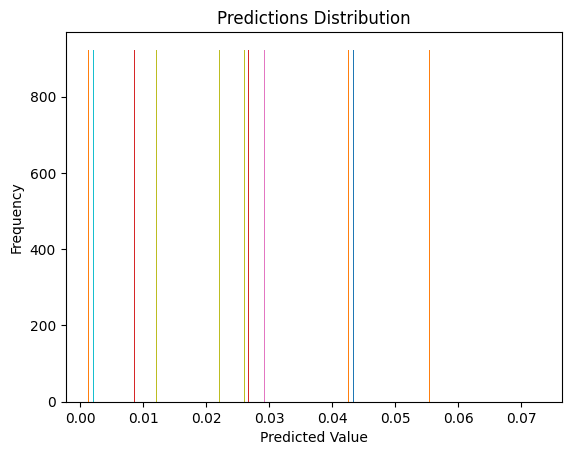

In [20]:
import matplotlib.pyplot as plt

plt.hist(y_pred_proba, bins=30)
plt.title("Predictions Distribution")
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
'''from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize base models
bagging_knn = BaggingClassifier(KNeighborsClassifier(), n_estimators=50, random_state=42)
catboost = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=6,
                           class_weights=[1] * 45,  # Adjust this based on the imbalance
                           random_seed=42)
# Meta-model (Logistic Regression, but you can use any model)
meta_model = LogisticRegression()

# Create a Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('bagging_knn', bagging_knn), ('cat',CatBoostClassifier)],
    final_estimator=meta_model
)

# Train the stacking ensemble model
stacking_clf.fit(X_train_prepared, y_train_cleaned)


In [ ]:
'''# Predict on test data
c_predictions = stacking_clf.predict(X_test_prepared)

NameError: name 'stacking_clf' is not defined

In [ ]:
'''ensample = stacking_clf.predict_proba(X_train_prepared)
# Calculate Log Loss using sklearn
log_loss_value = log_loss(y_train_cleaned, en_predictions)
print(f"Log Loss: {log_loss_value}")

In [24]:
'''# Import the necessary class
from sklearn.neighbors import KNeighborsClassifier

# Bagging KNN
bagged_knn = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=10,  # Number of KNN models
    random_state=42
)

# Train bagged KNN
bagged_knn.fit(X_train_prepared, y_train_cleaned)

SyntaxError: incomplete input (<ipython-input-24-39de6eac64fe>, line 1)

In [ ]:
'''# Predict probabilities on test data
en_predictions = stacking_clf.predict_proba(X_test_prepared)



**Submission**

In [21]:
submission = pd.DataFrame({'id': id})
columns = [f'Target_{i}' for i in range(125)]
submission[columns] = 0.00001

# Get predicted probabilities for all classes
y_pred_proba = cat_modle.predict_proba(X_test_prepared) # Assuming X_test is your test data

for i, class_label in enumerate(cat_modle.classes_):
    submission['Target_' + str(class_label)] = y_pred_proba[:, i]

In [22]:
submission

,id,Target_0,Target_1,Target_2,Target_3,Target_4,Target_5,Target_6,Target_7,Target_8,...,Target_115,Target_116,Target_117,Target_118,Target_119,Target_120,Target_121,Target_122,Target_123,Target_124
0,id_utdshhcma9,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
1,id_wpr03x91k8,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
2,id_ihn04pau10,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
3,id_dujctwctkv,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
4,id_fjf3v7c0h6,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,id_4zy8kfq53o,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
919,id_qai88fi8g4,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
920,id_eqahzvkqzx,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001
921,id_thyigbf2aa,0.00001,0.035022,0.002062,0.00679,0.009409,0.006786,0.00001,0.00001,0.00001,...,0.00001,0.00001,0.00001,0.002081,0.00001,0.00001,0.00001,0.00001,0.00156,0.00001


In [23]:
submission.to_csv('submission.csv', index=False)

SyntaxError: incomplete input (<ipython-input-318-659c386d578e>, line 1)

In [ ]:
sub

,id,Target_0,Target_1,Target_2,Target_3,Target_4,Target_5,Target_6,Target_7,Target_8,...,Target_115,Target_116,Target_117,Target_118,Target_119,Target_120,Target_121,Target_122,Target_123,Target_124
0,id_0,0.438347,0.851061,0.966168,0.341747,0.650042,0.066717,0.075791,0.507326,0.555521,...,0.836912,0.445287,0.589186,0.699029,0.074704,0.665842,0.442513,0.355544,0.152600,0.134683
1,id_1,0.565642,0.615802,0.677542,0.230855,0.735124,0.546815,0.441809,0.166270,0.597937,...,0.166521,0.458990,0.461271,0.501299,0.864769,0.400230,0.667635,0.249743,0.757617,0.976212
2,id_2,0.036709,0.630361,0.234653,0.854185,0.377753,0.702878,0.531959,0.459548,0.445115,...,0.431271,0.835641,0.440805,0.076602,0.185930,0.158767,0.998277,0.300903,0.161452,0.055259
3,id_3,0.725053,0.492855,0.343015,0.734363,0.020648,0.653114,0.752422,0.202715,0.409347,...,0.700429,0.396790,0.546269,0.142183,0.999901,0.044354,0.692089,0.688210,0.969250,0.637524
4,id_4,0.191372,0.845806,0.136797,0.503039,0.421207,0.016428,0.963039,0.022698,0.085996,...,0.812558,0.452537,0.471067,0.495789,0.181787,0.430111,0.270977,0.689454,0.122307,0.551863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,id_2118,0.262129,0.304762,0.406346,0.774544,0.065903,0.603115,0.722647,0.022611,0.407640,...,0.940148,0.648012,0.471634,0.174771,0.156917,0.719496,0.678512,0.915763,0.413135,0.728303
2119,id_2119,0.095131,0.447390,0.279403,0.109684,0.304521,0.617234,0.590694,0.928764,0.606812,...,0.857649,0.551243,0.544300,0.576428,0.415837,0.963984,0.053101,0.258866,0.104772,0.550319
2120,id_2120,0.491155,0.305032,0.221534,0.343905,0.499069,0.269462,0.053667,0.173733,0.304702,...,0.446139,0.424264,0.894880,0.544505,0.136195,0.507469,0.659142,0.162943,0.862594,0.133956
2121,id_2121,0.436639,0.561967,0.951434,0.957295,0.658245,0.913562,0.660419,0.719754,0.634709,...,0.197783,0.901564,0.145121,0.879382,0.230877,0.439661,0.089016,0.605384,0.973388,0.661553
